<img src="UNAM.png/" width=80 height=80 align=left hspace =3 vspace=5>
<img src="geo.jpg/" width = 70 height=70  align=left hspace=3 vspace=5>
<img src="uas.png/" width=70 height=70 align=right hspace =3 vspace=5>

## <center>ANALISIS DE LA SEÑAL SISMICA DE UN LAHAR: 12 DE OCTUBRE DE 2011, LAHAR EN EL VOLCÁN DE COLIMA, MÉXICO

<p style="text-align:justify"><I> Guillermo Alberto Sapiéns Peiro|Facultad de Ciencias de la Tierra y el Espacio |Universidad Autónoma de Sinaloa|galberto.sapiens@gmail.com. Asesor Dr. Victor Hugo Márquez|Centro de Goeciencias|Universidad Nacional Autónoma de México.<p>

#### PLANTEAMIENTO DEL PROBLEMA
<p style="text-align:justify">El volcán de colima es uno de los volcanes más activos en México en el cual los lahares son muy comunes. Los lahares son considerados uno de los fenómenos más peligrosos entre los procesos volcánicos, son mezclas de detritos rocosos movilizados por agua, que fluyen rápidamente y se originan en las laderas de los volcanes.
El monitoreo sísmico o acústico en los volcanes se utiliza como la base para los sistemas de alerta de lahares, por eso el análisis de los datos obtenidos en las estaciones es de importancia para entender los procesos del fenómeno. En octubre de 2011 el Huracan Jova afectó los estados de Colima, Jalisco y Nayarit dejando fuertes lluvias durante su paso, las cuales son una fuente importante en el proceso de formación de lahares en el volcán de Fuego de colima. El fenómeno suscitado el 12 de octubre de 2011 durante el paso de jova fue registrado por sensores de monitoreo situados en el volcán, de los cuales se obtuvieron datos para su respectivo análisis.</p>


#### METODOLOGÍA
<p style="text-align:justify">Los datos del lahar del 12 de octubre se procesan con codigos abiertos utilizando el lenguaje de programación julia. Julia es un lenguaje de programación de alto nivel, multiplataforma y de alto desempeño para la computación cientifica.Los codgos se apoyaran utilizando la plataforma Jupyter Notebook el cual es un código abierto que se utilza como apoyo interactivo a la ciencia y se puede utilizar con cualquier lenguaje de programación.

En una libreta de Jupyter Notebook los datos son cargados para realizar su analisis mediante los codigos Julia, obteniendo sismogramas del lahar en tres componentes(N-S,E-W,Z),donde se observan la ocurrencia de varios eventos, mismos que se separan para analizarse.La señal aislada de cada evento pasan a través de un analisis, obteniendo así los espectros de frecuencias y sus respectivos espectrogramas.Procesados los datos se analiza cada evento para construir un analisis de la densidad.</p>


In [1]:
#PyPlot es un modulo que prove una interface de julia a la libreria Matplotlib de python que permite crear graficas en julia.
#El comando using se utiliza para indicar a julia que se utilizará un modulo externo previamente instalado.
using PyPlot;

In [2]:
#Los datos utilizados en esta libreta corresponden a la estación Sismologica de Montegrande, ubicada en el volcán de colima.
#Las coordenadas de la estación son lo -103.620450557, Lat.19.4593353337, Elev. 2020.0241616887
#Los datos están en formato .dat, ascii.
#El comando readdlm se utilizó para leer los archivos ".dat" de las tres componentes de la estación.
datE=readdlm("JovaE-O.dat") #Componente Este.
datN=readdlm("JovaN-S.dat") #Componente Norte.
datZ=readdlm("JovaZ.dat");  #Componente Elevación.

In [4]:
δ=100 #Taza de muestreo del instrumento, 100 sps.
#El comando collect se utiliza para obtener srings, indicandole el dato incial, el intervalo de crecimiento y el dato final.
t=collect(0:1:length(datE)-1)*(1/δ) #Esta linea crea un string o "vector" de igual tamaño que el de los datos
#al multimplicarse por "1/δ" se obitene un vector del tiempo de medición.
t1=(t/3600);#Esta celda pasa el vector del tiempo a horas.

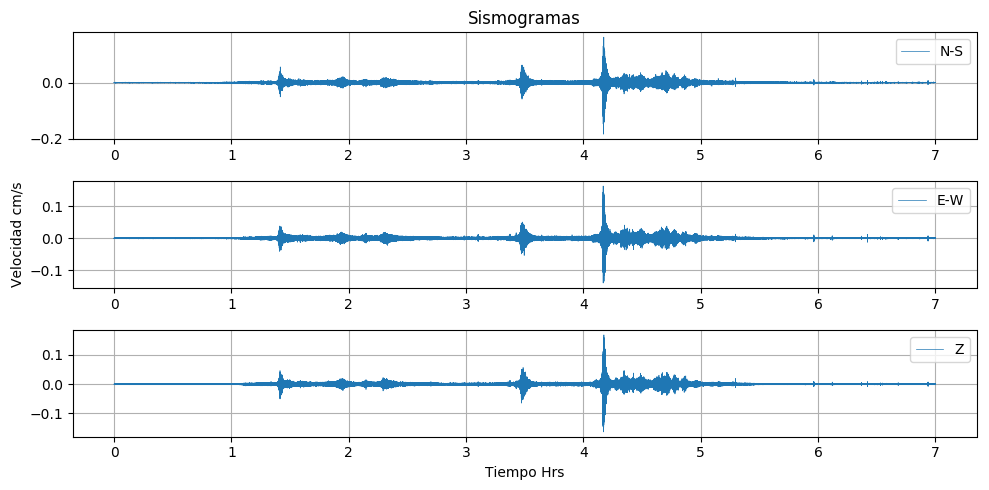

In [14]:
#Celda para crear las figuras de sismogramas.
fig = figure("Sismogramas",figsize=(10,5)) #Esta linea crea una figura
subplot(311) #Crea una figura en la primer fila.
    plot(t1,datN,linewidth=0.5,label="N-S")# gráfica la componente Norte-Sur de la estación.
        #linewidth indica el grosor de la linea, label el nombre o étiqueta de los datos graficados.
    axis("tight");title("Sismogramas");grid("on");legend(loc="upper right",fancybox="true")
        #axis indica el largo del eje del gráfico,title Crea el nombre de la figura, mientras que legend indica la posición de la leyenda
subplot(312) #Crea una figura en la segunda fila.
    plot(t1,datE,linewidth=0.5,label="E-W")# gráfica la componente Este-Oeste de la estación.
    axis("tight");grid("on");ylabel("Velocidad cm/s");legend(loc="upper right",fancybox="true")
subplot(313) #Crea una figura  en la tercer fila.
    plot(t1,datZ,linewidth=0.5,label="Z")# gráfica la componente Elevación de la estación.
    axis("tight");grid("on");xlabel("Tiempo Hrs");legend(loc="upper right",fancybox="true")
PyPlot.tight_layout()
 fig[:canvas][:draw]() #Actualiza la figura.

#### Del Tiempo a Frecuencias
<p style="text-align:justify">En la sismología, es normal utilizar la transformada de Fourier para transformar una señal del dominio del tiempo a una del dominio de las frecuencias, esto quiere decir quese divide la señal y se separa su contenido de cada frecuencia entre si. De este modo, podemos analizar nuestra señal según el contenido de energía por frecuencia. Podemos extraer información sobre la cantidad de amplitud que cada frecuencia contribuye a la señal final.</p>

In [6]:
#El comando fft aplica la transformada rápida de Fourier, pasando la señal del dominio del tiempo al dominio de las frecuencias.
FN=fft(datN) #datos en dominio de frecuencias de la componente Norte.
FE=fft(datE) #datos en dominio de frecuencias de la componente Este.
FZ=fft(datZ) #datos en dominio de frecuencias de la componente Elevación,
tF=collect(0:1:((length(FN)-1)/2))*((δ)/((length(FN)))); # Crea un sring de la mitad del tamaño del obtenido con la fft y lo convierte a las frecuencias
#multiplicando por "delta/total de datos".

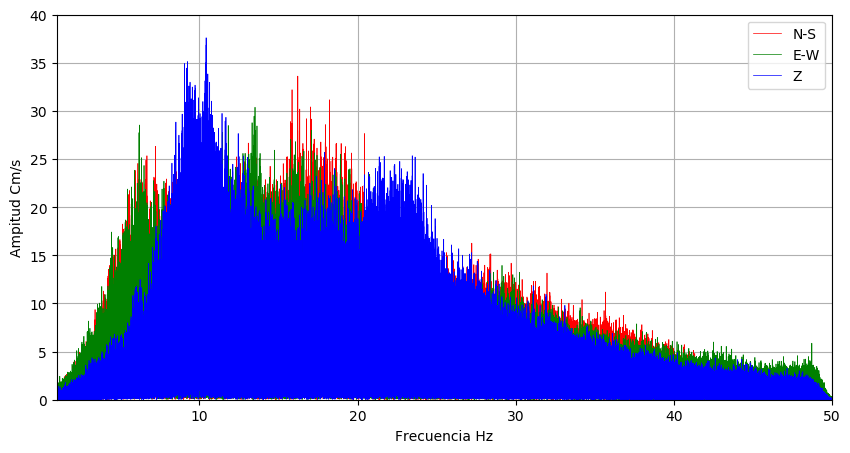

In [16]:
#Crea una figura de las frecuencias obtenidas aplicando la transformada de Fourier. 
TFfig=figure("Frecuencias",figsize=(10,5))
ax = gca() # gca() se utiliza para crear una figura donde se grafican varios datos.
ax[:set_ylim]([0,40]) # Establece los límites del eje y de la figura.
ax[:set_xlim]([1,50]) # Establece los límites del eje x de la figura.
#Se grafica cada componente por separado, cada una en un color diferente (red, green,blue), con un grosor de linea de 0.5 y su correspondeite
#etiqueta de la coponentente gráficada.
FFN=plot(tF,abs.(FN[1:Int((length(FN)/2))]),"r-",linewidth=0.5,label="N-S");grid("on");legend(loc="upper right",fancybox="true")
FFE=plot(tF,abs.(FE[1:Int((length(FE)/2))]),"g-",linewidth=0.5,label="E-W");grid("on");legend(loc="upper right",fancybox="true")
FFZ=plot(tF,abs.(FZ[1:Int((length(FZ)/2))]),"b-",linewidth=0.5,label="Z");grid("on");legend(loc="upper right",fancybox="true")
xlabel("Frecuencia Hz");ylabel("Ampitud Cm/s")
TFfig[:canvas][:draw]() #Actualiza la figura.

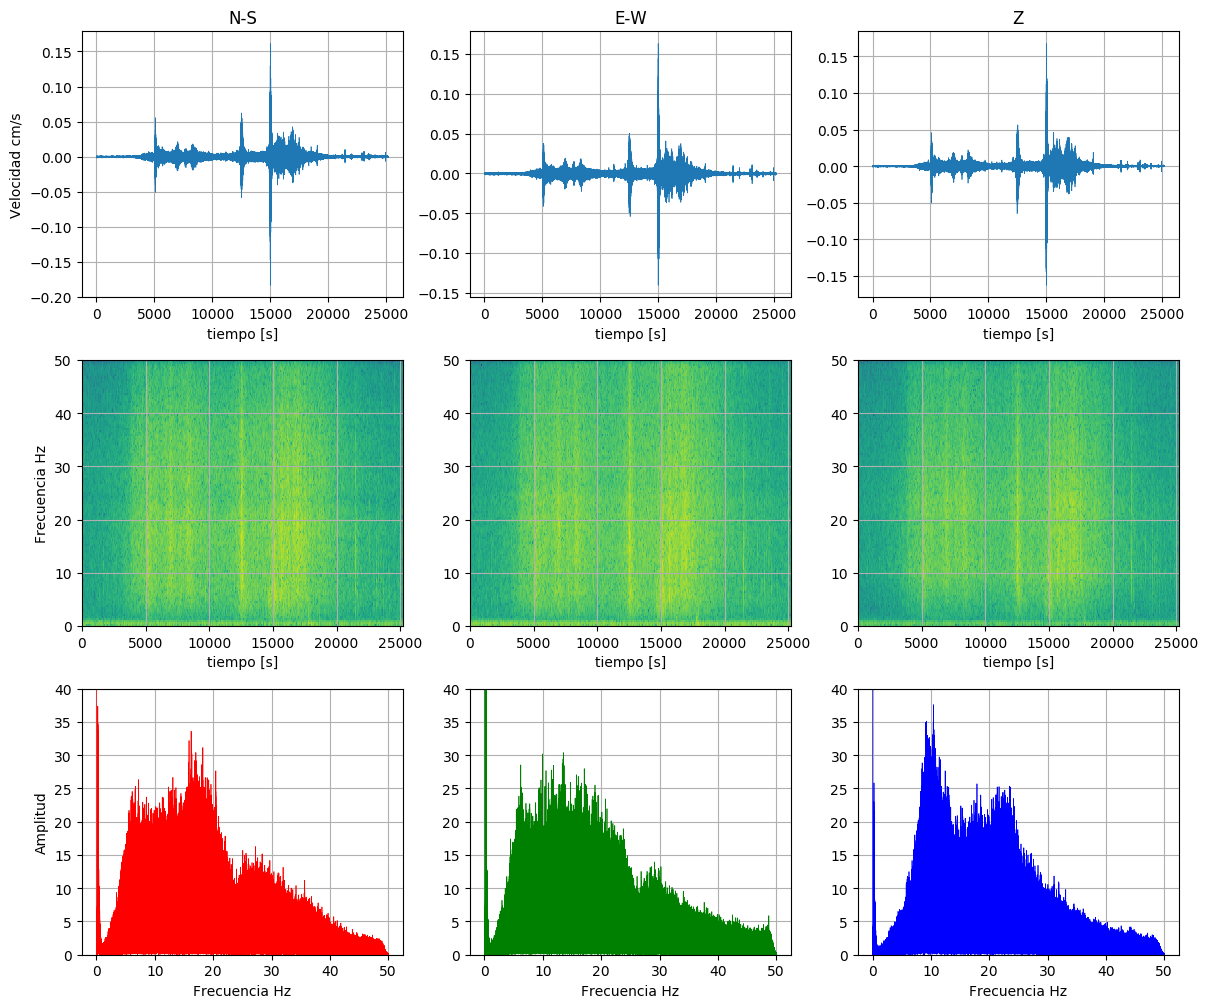

In [12]:
#Se crea una figura de 3x3, en la primer fila se grafica el sismograma y en la segunda un espectrograma correspondiente a cada 
#componente, ambos en el dominio del tiempo.En la tercer fila se grafica las frecuencias correspondientes.
fig = figure("Sismograma, espectrograma y frecuencia",figsize=(12,10)) # Cre una figura donde se graficaran los subplots
subplot(331) #gráfica una figura en la primier fila y primer columna.
    plot(t,datN,linewidth=0.5) #sismograma Norte-Este
    axis("tight");title("N-S");grid("on");ylabel("Velocidad cm/s");xlabel("tiempo [s]") ;legend(loc="upper right",fancybox="true") 
subplot(334) #gráfica una figura en la segunda fila primer columna.
#grafica un espectrograma de los datos de la estación, NFFT es la ventana de muestras generalmente es de 256, Fs es la frecuencia de muestreo
# en este caso FS=100, noverlap es el traslape que habrá en la imagen del espectrograma, se usa el 50%
    Pxx, freqs, bins,im=PyPlot.specgram(datN[1:Int(length(datN))],NFFT=256,Fs=100,noverlap=50) #espectrograma Norte-Sur.
    axis("tight");grid("on");ylabel("Frecuencia Hz");xlabel("tiempo [s]") ;legend(loc="upper right",fancybox="true") 
subplot(337) #gráfica una figura en la tercer fila y primer columna.
#gráfica de la amplitud de la componente Norte-Sur.
    plot(tF,abs.(FN[1:Int((length(FN)/2))]),"r-",linewidth=0.5);grid("on");legend(loc="upper right",fancybox="true")
    ylabel("Amplitud");xlabel("Frecuencia Hz");ylim((0,40))
subplot(332) #gráfica una figura en la primer fila segunda columna.
    plot(t,datE,linewidth=0.5) #Sismograma de la componente Este-Oeste.
    axis("tight");title("E-W");grid("on");xlabel("tiempo [s]") ;legend(loc="upper right",fancybox="true") 
subplot(335) #gráfica una figura en la segunda fila y segunda columna.
    Pxx, freqs, bins,im=PyPlot.specgram(datE[1:Int(length(datE))],NFFT=256,Fs=100,noverlap=50) #Espectrograma Este-Oeste. 
    axis("tight");grid("on");legend(loc="upper right",fancybox="true") ;xlabel("tiempo [s]") 
subplot(338) #gráfica una figura en la tercer fila y segunda columna.
    plot(tF,abs.(FE[1:Int((length(FE)/2))]),"g-",linewidth=0.5);grid("on");legend(loc="upper right",fancybox="true") #Frecuencias Este-Oeste.
    ylim((0,40));xlabel("Frecuencia Hz") 
subplot(333) #gráfica una figura en la primer fila y tercer columna.
    plot(t,datZ,linewidth=0.5) #sismograma componente Elevación.
    axis("tight");title("Z");grid("on");legend(loc="upper right",fancybox="true");xlabel("tiempo [s]")  
subplot(336) #gráfica una figura en la segunda fila y tercer columna.
    Pxx, freqs, bins,im=PyPlot.specgram(datZ[1:Int(length(datZ))],NFFT=256,Fs=100,noverlap=50) #Espectrograma Elevación.
    axis("tight");grid("on");legend(loc="upper right",fancybox="true") ;xlabel("tiempo [s]") 
subplot(339) #gráfica una figura en la tercer fila y tercer columna.
    plot(tF,abs.(FZ[1:Int((length(FZ)/2))]),"b-",linewidth=0.5);grid("on");legend(loc="upper right",fancybox="true")# Frecuencias Elevación.
    ylim((0,40));xlabel("Frecuencia Hz") 
PyPlot.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig[:canvas][:draw]() #Actualiza la figura.


#### Analisis de densidad 
Power Espectral Density(PSD)

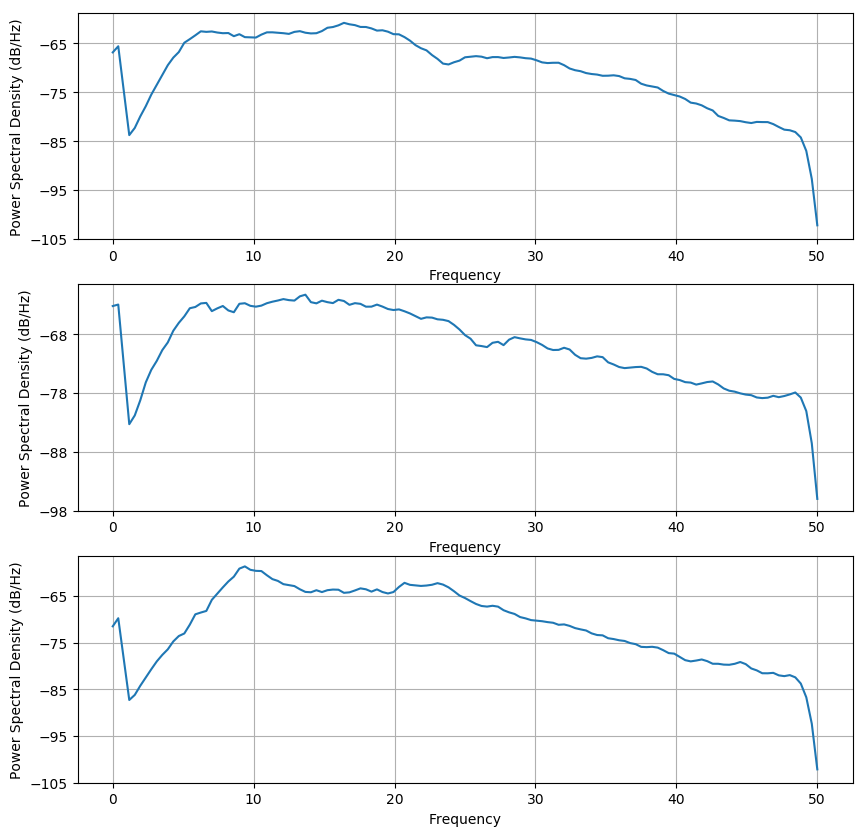

In [4]:
fig = figure("pyplot_subplot_mixed",figsize=(10,10))
subplot(311)
    PyPlot.psd(datN[1:length(datN)],NFFT=256,Fs=100,noverlap=0);xlim=(1,50)
subplot(312)
    PyPlot.psd(datE[1:length(datE)],NFFT=256,Fs=100,noverlap=0);xlim=(1,50)
subplot(313)
    PyPlot.psd(datZ[1:length(datZ)],NFFT=256,Fs=100,noverlap=0);xlim=(1,50)
fig[:canvas][:draw]() 

##### CONCLUSIONES
<p style="text-align:justify">Las velocidades de los lahares dependen del tamaño de los detritos y el contenido de agua.Las areas de inundación y alcance de un lahar dependen de su volumen, tamaño de lo detritos, transformacions durante el flujo y de la topografía. Su frecuencia depende principalmente de la cantidad de volumen de precipitados o el volumen de agua disponible y del material suelto en las laderas volcánicas.En las temporadas lluviosas el riesgo de los lahares es más latente generalmente entre los meses de junio y julio, además los fenomenos naturales extraordinarios como los huracanes presentan un riesgo mayor por los volumenes de agua que arrastra.</p>
